# Generating a Cosmological Constant with Gravitational Waves Barrabes Hogan
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 11, 2022

Lots more to do here, just getting started

https://arxiv.org/abs/1402.1401

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy')

In [4]:
M = Function('M')(u,v)
M

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [7]:
variables = Matrix([u,v,x,y])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix([du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [11]:
lineElement = expand( exp(-U) * ( exp(V) *dx**2 + exp(-V)*dy**2) + 2*exp(-M)*du*dv ) 
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                         ⎤
⎢    0      ℯ                  0                    0         ⎥
⎢                                                             ⎥
⎢ -M(u, v)                                                    ⎥
⎢ℯ              0              0                    0         ⎥
⎢                                                             ⎥
⎢                       -U(u, v)  V(u, v)                     ⎥
⎢    0          0      ℯ        ⋅ℯ                  0         ⎥
⎢                                                             ⎥
⎢                                           -U(u, v)  -V(u, v)⎥
⎣    0          0              0           ℯ        ⋅ℯ        ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                         ⎤
⎢    0      ℯ                  0                    0         ⎥
⎢                                                             ⎥
⎢ -M(u, v)                                                    ⎥
⎢ℯ              0              0                    0         ⎥
⎢                                                             ⎥
⎢                       -U(u, v)  V(u, v)                     ⎥
⎢    0          0      ℯ        ⋅ℯ                  0         ⎥
⎢                                                             ⎥
⎢                                           -U(u, v)  -V(u, v)⎥
⎣    0          0              0           ℯ        ⋅ℯ        ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                             0                                             
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                             0                                             
⎢⎢                                                                                          
⎢⎢                 ⎛∂             ∂          ⎞  M(u, v) - U(u, v) + V(u, v)                 
⎢⎢                 ⎜──(U(u, v)) - ──(V(u, v))⎟⋅ℯ                                            
⎢⎢                 ⎝∂v            ∂v         ⎠                                              
⎢⎢     0        0  ───────────────────────────────────────────────────

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

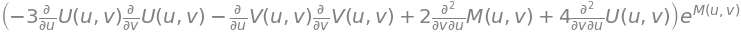

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

In [22]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [23]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [24]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

In [25]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

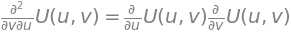

In [48]:
equation2pt6 = Eq(diff(U,u,v),solve( einsteinSimplified[1,0], diff(U,u,v) )[0])
equation2pt6

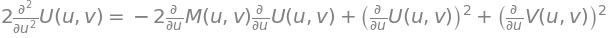

In [49]:
equation2pt7 = Eq(2*diff(U,u,u),2*solve( einsteinSimplified[0,0], diff(U,u,u) )[0] ) 
equation2pt7

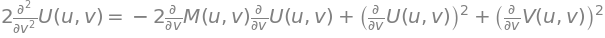

In [50]:
equation2pt8 = Eq(2*diff(U,v,v),2*solve( einsteinSimplified[1,1], diff(U,v,v) )[0] ) 
equation2pt8

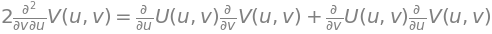

In [51]:
equation2pt9 = Eq( 2*diff(V,u,v),2*solve( ( ricciSimplified[3,3].args[0] - ricciSimplified[2,2].args[0] ), diff(V,u,v) )[0] )
equation2pt9

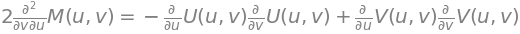

In [55]:
equation2pt10 = Eq(2*diff(M,u,v), 2*solve( ( einsteinSimplified[2,2].args[1] + einsteinSimplified[3,3].args[1] ).subs(equation2pt6.lhs,equation2pt6.rhs), diff(M,u,v) )[0] )
equation2pt10

In [57]:
vacuumFieldEquations = Matrix([equation2pt6,equation2pt7,equation2pt8,equation2pt9,equation2pt10])
vacuumFieldEquations

⎡                      2                                                       ⎤
⎢                     ∂              ∂           ∂                             ⎥
⎢                   ─────(U(u, v)) = ──(U(u, v))⋅──(U(u, v))                   ⎥
⎢                   ∂v ∂u            ∂u          ∂v                            ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂           ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(M(u, v))⋅──(U(u, v)) + ⎜──(U(u, v))⎟  + ⎜──(V(u, v))⎟ ⎥
⎢    2                ∂u          ∂u            ⎝∂u         ⎠    ⎝∂u         ⎠ ⎥
⎢  ∂u                                                                          ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂     